# Machine Learning Advanced

## Aprendizaje Supervisado - Preprocesamiento

Manuel Montoya - `manuel.montoya@pucp.edu.pe`

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

Loan Prediction: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns

In [2]:
pd.__version__

'1.0.3'

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
sns.__version__

'0.11.0'

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [7]:
seed = 12345

## Lectura de bases

In [8]:
data_creditos = pd.read_csv('loan_prediction.csv')

In [9]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


`head` `shape`

In [10]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data_creditos.shape

(614, 13)

In [12]:
id_columns = 'Loan_ID'
target = 'Loan_Status'

convertimos el target a numérico con `map`

In [13]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [14]:
mapping_target = {'Y': 0, 'N': 1}

In [15]:
data_creditos[target] = data_creditos[target].map(mapping_target)

In [16]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1


porcentaje de unos en el target

In [17]:
data_creditos[target].mean()

0.3127035830618892

In [18]:
data_creditos[target].value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

eliminar el id de los clientes

In [19]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1


In [20]:
id_columns

'Loan_ID'

In [21]:
data_creditos = data_creditos.drop(id_columns, axis = 1)

In [22]:
data_creditos.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1


## División en conjuntos de entrenamiento y validación

`train_test_split` `random_state` `stratify` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

división en features y target

In [23]:
data_creditos.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1


In [24]:
X = data_creditos.drop(target, axis = 1)
y = data_creditos[target]

In [25]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [26]:
y.head(2)

0    0
1    1
Name: Loan_Status, dtype: int64

In [27]:
X.shape

(614, 11)

In [28]:
y.shape

(614,)

In [29]:
y.mean()

0.3127035830618892

división en train y test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed, stratify = y)

In [32]:
X_train.shape, X_test.shape

((491, 11), (123, 11))

In [33]:
y_train.shape, y_test.shape

((491,), (123,))

In [34]:
y_train.mean()

0.3136456211812627

In [35]:
y_test.mean()

0.3089430894308943

In [36]:
y_train.value_counts()

0    337
1    154
Name: Loan_Status, dtype: int64

In [37]:
y_test.value_counts()

0    85
1    38
Name: Loan_Status, dtype: int64

## Exploración

Columnas del conjunto de datos

In [38]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural
486,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural
434,Male,No,0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban
376,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural


In [39]:
y_train.head()

209    1
426    1
486    1
434    0
376    0
Name: Loan_Status, dtype: int64

In [40]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

`info`

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 209 to 412
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            488 non-null    object 
 2   Dependents         477 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      464 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         473 non-null    float64
 8   Loan_Amount_Term   478 non-null    float64
 9   Credit_History     455 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


`describe`

In [42]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,473.000000,478.000000,455.000000
mean,5630.336049,1594.352179,149.088795,343.832636,0.832967
std,6603.836947,3012.677226,88.738956,62.772068,0.373416
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2897.000000,0.000000,102.000000,360.000000,1.000000
50%,3814.000000,1086.000000,128.000000,360.000000,1.000000
75%,5945.000000,2253.500000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [43]:
X_train.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,479,488,477,491,464,491
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,389,326,273,391,396,187


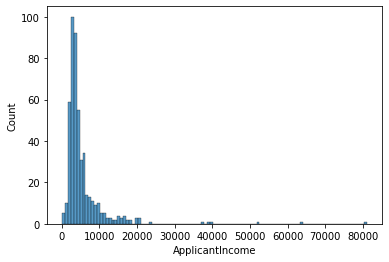

In [44]:
sns.histplot(data = X_train, x = 'ApplicantIncome')

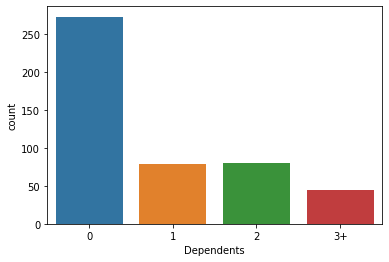

In [45]:
sns.countplot(data = X_train, x = 'Dependents')

## 0. Verificación de tipos de variables

In [47]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [46]:
X_train['Dependents'].value_counts()

0     273
2      80
1      79
3+     45
Name: Dependents, dtype: int64

In [48]:
X_train['Dependents'] = X_train['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

In [49]:
X_train['Dependents'].value_counts()

0.0    273
2.0     80
1.0     79
3.0     45
Name: Dependents, dtype: int64

In [50]:
X_train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

## 1. Tratamiento de valores nulos

<img src = 'https://miro.medium.com/max/2816/1*MiJ_HpTbZECYjjF1qepNNQ.png'>

cantidad de nulos por columna

In [51]:
X_train.isna().sum()

Gender               12
Married               3
Dependents           14
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
Property_Area         0
dtype: int64

porcentaje de nulos

In [52]:
X_train.isna().mean()

Gender               0.024440
Married              0.006110
Dependents           0.028513
Education            0.000000
Self_Employed        0.054990
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.036660
Loan_Amount_Term     0.026477
Credit_History       0.073320
Property_Area        0.000000
dtype: float64

Missigno: https://github.com/ResidentMario/missingno

In [53]:
import missingno as msno

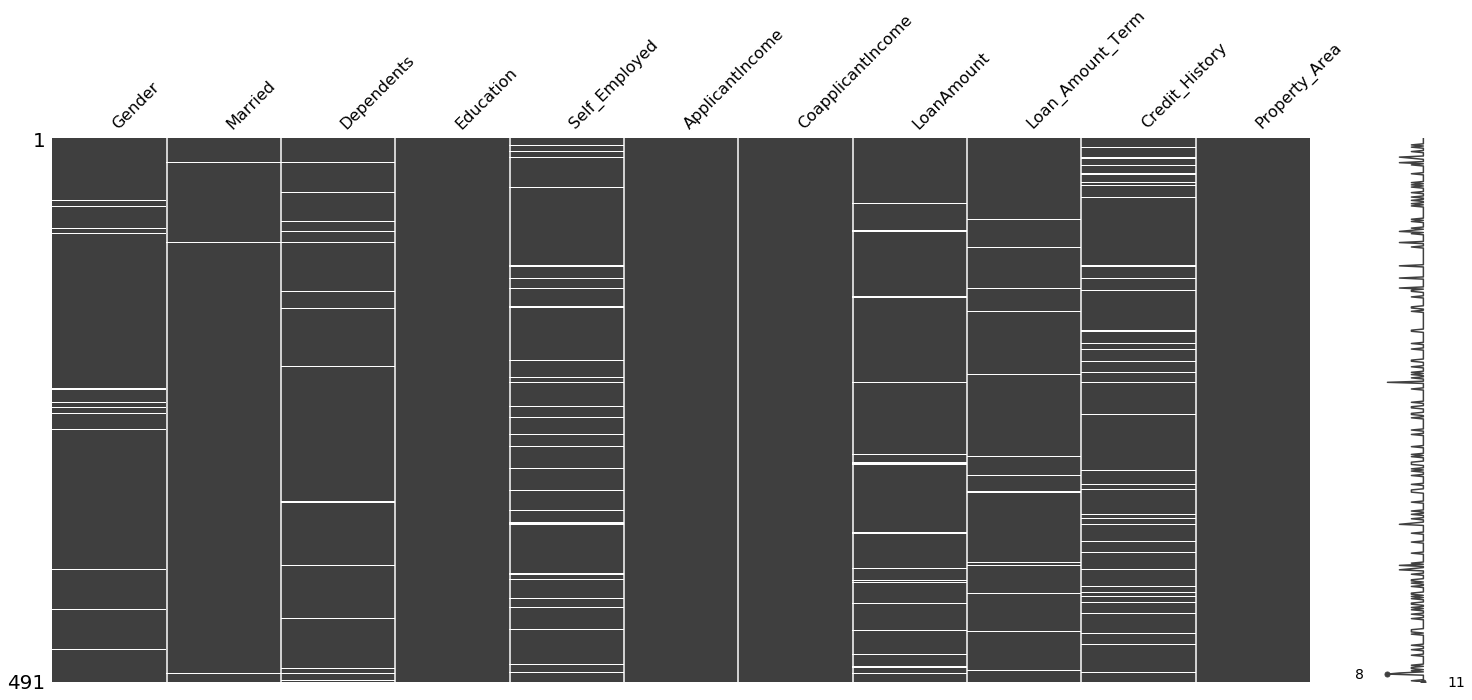

In [54]:
msno.matrix(X_train)

El método de imputación depende de la naturaleza de la variable. Separamos las variables categóricas de las numéricas

`select_dtypes`

In [55]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0.0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1.0,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural


In [56]:
X_train.select_dtypes('number').head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
209,0.0,3418,0.0,127.0,360.0,1.0
426,1.0,4606,0.0,81.0,360.0,1.0


In [57]:
X_train.select_dtypes('object').head(2)

,Gender,Married,Education,Self_Employed,Property_Area
209,Male,No,Graduate,No,Semiurban
426,Female,No,Not Graduate,No,Rural


In [58]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [59]:
X_train_num.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
209,0.0,3418,0.0,127.0,360.0,1.0
426,1.0,4606,0.0,81.0,360.0,1.0


In [60]:
X_train_cat.head(2)

,Gender,Married,Education,Self_Employed,Property_Area
209,Male,No,Graduate,No,Semiurban
426,Female,No,Not Graduate,No,Rural


### 1.1 imputación numéricas
imputación con media o mediana

In [61]:
X_train_num.isnull().sum()

Dependents           14
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
dtype: int64

cuidado con la imputación por media

In [62]:
X_train_num['Dependents'].mean()

0.7840670859538784

In [63]:
X_train_num['Dependents'].median()

0.0

¿tiene sentido imputar la cantidad de dependientes con el valor de la media?

SimpleImputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [65]:
from sklearn.impute import SimpleImputer

In [66]:
imputer_num = SimpleImputer(strategy='median')

In [67]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

el `SimpleImputer` calcula las medianas para todas las columnas (incluso si estas no tienen nulos)

In [70]:
X_train_num.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [68]:
imputer_num.statistics_

array([0.000e+00, 3.814e+03, 1.086e+03, 1.280e+02, 3.600e+02, 1.000e+00])

In [71]:
X_train_num_imputed = pd.DataFrame(imputer_num.transform(X_train_num), columns = X_train_num.columns)
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3418.0,0.0,127.0,360.0,1.0
1,1.0,4606.0,0.0,81.0,360.0,1.0
2,2.0,3547.0,0.0,80.0,360.0,0.0
3,0.0,3750.0,0.0,100.0,360.0,1.0
4,3.0,8750.0,4996.0,130.0,360.0,1.0


In [72]:
X_train_num_imputed.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### 1.2 imputación de categóricas

las variables categóricas se van a imputar con el valor más frecuente (moda)

In [73]:
X_train_cat.isnull().sum()

Gender           12
Married           3
Education         0
Self_Employed    27
Property_Area     0
dtype: int64

In [74]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

X_train_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Semiurban
1,Female,No,Not Graduate,No,Rural
2,Male,No,Graduate,No,Rural
3,Male,No,Graduate,No,Urban
4,Male,Yes,Graduate,No,Rural


In [75]:
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

Ya no tenemos valores nulos!

### Se puede usar también el módulo sklearn.impute para llenar valores nulos (KNNImputer)

In [76]:
from sklearn.impute import KNNImputer
knn = KNNImputer()

In [77]:
# TODO: imputar las variables numéricas con KNN Imputer - interpretar los resultados

# ...

## 2.1 Encoding de variables categóricas

In [79]:
X_train_cat_imputed.describe()

,Gender,Married,Education,Self_Employed,Property_Area
count,491,491,491,491,491
unique,2,2,2,2,3
top,Male,Yes,Graduate,No,Semiurban
freq,401,329,391,423,187


`get_dummies`

In [80]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first= True)

In [81]:
X_train_cat_dummies.head(2)

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,0
1,0,0,1,0,0,0


Otra alternativa para generar los dummies

In [82]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#...

## 2.2. Tratamiento de valores extremos

<img src= 'https://miro.medium.com/max/1352/1*xsJKdRtENPJn4WWx604LGQ.png'>

In [83]:
X_train_num_imputed.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3418.0,0.0,127.0,360.0,1.0
1,1.0,4606.0,0.0,81.0,360.0,1.0


In [84]:
X_train_num_imputed.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000
75%,2.000000,5945.000000,2253.500000,166.500000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


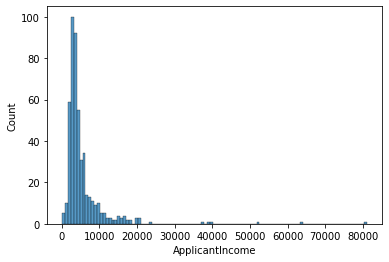

In [85]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')

In [86]:
X_train_num_imputed.describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
1%,0.000000,967.400000,0.000000,35.900000,84.000000,0.000000
2.5%,0.000000,1606.250000,0.000000,50.000000,180.000000,0.000000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000
75%,2.000000,5945.000000,2253.500000,166.500000,360.000000,1.000000


In [87]:
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000
75%,2.000000,5945.000000,2253.500000,166.500000,360.000000,1.000000
90%,2.000000,10047.000000,3750.000000,230.000000,360.000000,1.000000
95%,3.000000,14999.500000,4866.500000,302.000000,360.000000,1.000000
97.5%,3.000000,19196.250000,6562.000000,403.750000,450.000000,1.000000
99%,3.000000,37861.800000,8128.700000,507.000000,480.000000,1.000000


In [88]:
p1 = np.percentile(X_train_num_imputed['ApplicantIncome'], 1)
p99 = np.percentile(X_train_num_imputed['ApplicantIncome'], 99)

In [89]:
p1, p99

(967.4000000000001, 37861.80000000003)

In [90]:
X_train_num_imputed['ApplicantIncome'] = np.clip(X_train_num_imputed['ApplicantIncome'], p1, p99)

In [91]:
X_train_num_imputed.describe(percentiles = [0.01, 0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5460.896130,1594.352179,148.315682,344.260692,0.845214
std,1.029286,5166.358437,3012.677226,87.184113,61.988258,0.362070
min,0.000000,967.400000,0.000000,9.000000,36.000000,0.000000
1%,0.000000,996.740000,0.000000,35.900000,84.000000,0.000000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000
75%,2.000000,5945.000000,2253.500000,166.500000,360.000000,1.000000
90%,2.000000,10047.000000,3750.000000,230.000000,360.000000,1.000000


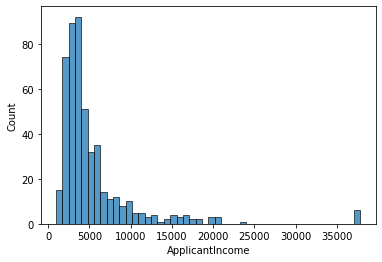

In [92]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')

## 3. Consolidación

In [93]:
X_train_cat_dummies.head(2)

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,0
1,0,0,1,0,0,0


In [94]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3418.0,0.0,127.0,360.0,1.0
1,1.0,4606.0,0.0,81.0,360.0,1.0
2,2.0,3547.0,0.0,80.0,360.0,0.0
3,0.0,3750.0,0.0,100.0,360.0,1.0
4,3.0,8750.0,4996.0,130.0,360.0,1.0


In [95]:
X_train_cat_dummies.shape

(491, 6)

In [96]:
X_train_num_imputed.shape

(491, 6)

In [97]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)

In [98]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3418.0,0.0,127.0,360.0,1.0,1,0,0,0,1,0
1,1.0,4606.0,0.0,81.0,360.0,1.0,0,0,1,0,0,0
2,2.0,3547.0,0.0,80.0,360.0,0.0,1,0,0,0,0,0
3,0.0,3750.0,0.0,100.0,360.0,1.0,1,0,0,0,0,1
4,3.0,8750.0,4996.0,130.0,360.0,1.0,1,1,0,0,0,0


In [99]:
X_train_total.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

## 4. Creación de nuevas variables

<img src = 'https://i.pinimg.com/originals/89/0f/92/890f92f1dba99065531aa2bc1b6b9c45.jpg'>

In [100]:
X_train_total.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3418.0,0.0,127.0,360.0,1.0,1,0,0,0,1,0
1,1.0,4606.0,0.0,81.0,360.0,1.0,0,0,1,0,0,0


In [101]:
X_train_total['TotalIncome'] = X_train_total['ApplicantIncome'] +  X_train_total['CoapplicantIncome']
X_train_total['TotalIncomeByPerson'] = X_train_total['TotalIncome'] / (X_train_total['Dependents'] + 1)

X_train_total['Cuota'] = X_train_total['LoanAmount'] * 1000 / X_train_total['Loan_Amount_Term']
X_train_total['%Cuota'] = X_train_total['Cuota'] / X_train_total['TotalIncome']

In [102]:
X_train_total.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
0,0.0,3418.0,0.0,127.0,360.0,1.0,1,0,0,0,1,0,3418.0,3418.000000,352.777778,0.103212
1,1.0,4606.0,0.0,81.0,360.0,1.0,0,0,1,0,0,0,4606.0,2303.000000,225.000000,0.048849
2,2.0,3547.0,0.0,80.0,360.0,0.0,1,0,0,0,0,0,3547.0,1182.333333,222.222222,0.062651
3,0.0,3750.0,0.0,100.0,360.0,1.0,1,0,0,0,0,1,3750.0,3750.000000,277.777778,0.074074
4,3.0,8750.0,4996.0,130.0,360.0,1.0,1,1,0,0,0,0,13746.0,3436.500000,361.111111,0.026270


## Estandarización

In [103]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_total), columns = X_train_total.columns)

In [106]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
0,0.0,3418.0,0.0,127.0,360.0,1.0,1,0,0,0,1,0,3418.0,3418.000000,352.777778,0.103212
1,1.0,4606.0,0.0,81.0,360.0,1.0,0,0,1,0,0,0,4606.0,2303.000000,225.000000,0.048849
2,2.0,3547.0,0.0,80.0,360.0,0.0,1,0,0,0,0,0,3547.0,1182.333333,222.222222,0.062651
3,0.0,3750.0,0.0,100.0,360.0,1.0,1,0,0,0,0,1,3750.0,3750.000000,277.777778,0.074074
4,3.0,8750.0,4996.0,130.0,360.0,1.0,1,1,0,0,0,0,13746.0,3436.500000,361.111111,0.026270


In [107]:
X_train_scaled.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
0,0.000000,0.066422,0.000000,0.170767,0.72973,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.047970,0.064711,0.076574,0.078223
1,0.333333,0.098622,0.000000,0.104197,0.72973,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076810,0.038104,0.046723,0.034021
2,0.666667,0.069918,0.000000,0.102750,0.72973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051102,0.011361,0.046074,0.045243
3,0.000000,0.075421,0.000000,0.131693,0.72973,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.056030,0.072634,0.059053,0.054531
4,1.000000,0.210943,0.119903,0.175109,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.298696,0.065152,0.078520,0.015662


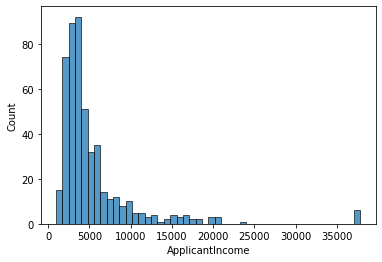

In [108]:
sns.histplot(X_train_total['ApplicantIncome'])

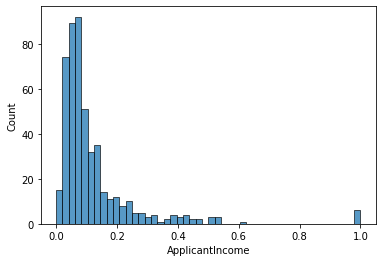

In [109]:
sns.histplot(X_train_scaled['ApplicantIncome'])

In [110]:
X_train_scaled.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.253904,0.121793,0.038264,0.201615,0.694281,0.845214,0.816701,0.670061,0.203666,0.138493,0.380855,0.344196,0.136269,0.103443,0.103243,0.055531
std,0.343095,0.140031,0.072304,0.126171,0.139613,0.362070,0.387306,0.470670,0.403134,0.345769,0.486092,0.475590,0.136971,0.107244,0.089984,0.052275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.052301,0.000000,0.137482,0.729730,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067221,0.039398,0.061973,0.039320
50%,0.000000,0.077155,0.026064,0.172214,0.729730,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.097397,0.082322,0.078520,0.050476
75%,0.666667,0.134915,0.054084,0.227931,0.729730,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.148680,0.127555,0.113043,0.060354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Repetir todo el preprocesamiento para el conjunto de test

In [111]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural
98,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban
433,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban
419,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban
439,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural


In [112]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 583 to 183
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             122 non-null    object 
 1   Married            123 non-null    object 
 2   Dependents         122 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      118 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         119 non-null    float64
 8   Loan_Amount_Term   122 non-null    float64
 9   Credit_History     109 non-null    float64
 10  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 11.5+ KB


Variable de dependientes

In [113]:
X_test['Dependents'] = X_test['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

Imputación de nulos

In [114]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

Numéricas

In [115]:
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test_num), columns = X_test_num.columns)
X_test_num_imputed.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1880.0,0.0,61.0,360.0,1.0
1,0.0,4188.0,0.0,115.0,180.0,1.0


Categóricas

In [116]:
X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test_cat), columns = X_test_cat.columns)
X_test_cat_imputed.head(2)

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,Yes,Graduate,No,Rural
1,Male,Yes,Not Graduate,No,Semiurban


Encoding

In [117]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

Capeo de valores atípicos (con los obtenidos del train)

In [118]:
X_test_num_imputed['ApplicantIncome'] = np.clip(X_test_num_imputed['ApplicantIncome'], p1, p99)

Consolidación

In [119]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [120]:
X_test_total['TotalIncome'] = X_test_total['ApplicantIncome'] + X_test_total['CoapplicantIncome']
X_test_total['TotalIncomeByPerson'] = X_test_total['TotalIncome'] / (X_test_total['Dependents'] + 1)
X_test_total['Cuota'] = X_test_total['LoanAmount']*1000 / X_test_total['Loan_Amount_Term']
X_test_total['%Cuota'] = X_test_total['Cuota'] / X_test_total['TotalIncome']

In [121]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_total), columns = X_test_total.columns)

Verificamos que ambas tengan la misma cantidad de columnas

In [122]:
X_train_scaled.shape

(491, 16)

In [123]:
X_test_scaled.shape

(123, 16)

Guardamos ambos datasets preprocesados

In [124]:
X_train_export = X_train_scaled.copy()
X_train_export[target] = y_train.values

X_test_export = X_test_scaled.copy()
X_test_export[target] = y_test.values

In [125]:
X_train_export.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,Loan_Status
0,0.000000,0.066422,0.000000,0.170767,0.72973,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.047970,0.064711,0.076574,0.078223,1
1,0.333333,0.098622,0.000000,0.104197,0.72973,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076810,0.038104,0.046723,0.034021,1
2,0.666667,0.069918,0.000000,0.102750,0.72973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051102,0.011361,0.046074,0.045243,1
3,0.000000,0.075421,0.000000,0.131693,0.72973,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.056030,0.072634,0.059053,0.054531,0
4,1.000000,0.210943,0.119903,0.175109,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.298696,0.065152,0.078520,0.015662,0


In [126]:
X_test_export.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,Loan_Status
0,0.333333,0.024735,0.000000,0.075253,0.729730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.010633,0.005578,0.033744,0.067586,1
1,0.000000,0.087292,0.000000,0.153401,0.324324,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.066663,0.083086,0.143413,0.118342,0
2,0.000000,0.039507,0.056160,0.193922,0.729730,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.080670,0.096855,0.086957,0.062084,0
3,0.000000,0.061760,0.034008,0.186686,0.729730,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.078194,0.094421,0.083712,0.061144,0
4,0.000000,0.167359,0.000000,0.186686,0.729730,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.138375,0.153578,0.083712,0.037943,0


In [127]:
X_train_export.to_csv('train_preprocesed.csv', index = False)
X_test_export.to_csv('test_preprocesed.csv', index = False)

## Balanceo de clases

Todo balanceo se realiza solo sobre la data de entrenamiento

In [128]:
X_train_scaled.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
0,0.000000,0.066422,0.000000,0.170767,0.72973,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.047970,0.064711,0.076574,0.078223
1,0.333333,0.098622,0.000000,0.104197,0.72973,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076810,0.038104,0.046723,0.034021
2,0.666667,0.069918,0.000000,0.102750,0.72973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.051102,0.011361,0.046074,0.045243
3,0.000000,0.075421,0.000000,0.131693,0.72973,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.056030,0.072634,0.059053,0.054531
4,1.000000,0.210943,0.119903,0.175109,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.298696,0.065152,0.078520,0.015662


In [129]:
y_train.head()

209    1
426    1
486    1
434    0
376    0
Name: Loan_Status, dtype: int64

In [130]:
y_train.mean()

0.3136456211812627

In [131]:
y_train.value_counts()

0    337
1    154
Name: Loan_Status, dtype: int64

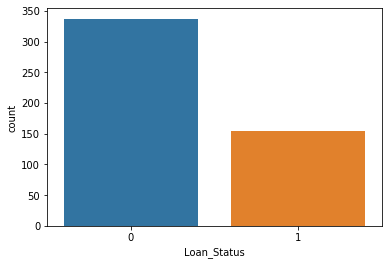

In [132]:
sns.countplot(x = y_train)

Undersampling y oversampling

In [133]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [134]:
rus = RandomUnderSampler(sampling_strategy = 1, random_state = seed)

In [135]:
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

In [136]:
y_rus.value_counts()

1    154
0    154
Name: Loan_Status, dtype: int64

Exportar conjuntos de datos balanceados 

In [138]:
X_train_export_rus = X_rus.copy()
X_train_export_rus[target] = y_rus.values

In [139]:
X_train_export_rus.to_csv('train_preprocesed_rus.csv', index = False)

Smote

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
smote = SMOTE(sampling_strategy = 1, random_state = seed)

In [142]:
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [143]:
y_smote.value_counts()

1    337
0    337
Name: Loan_Status, dtype: int64

Smote + Tomek

In [144]:
from imblearn.combine import SMOTETomek

In [145]:
smotetomek = SMOTETomek(sampling_strategy = 1)

In [146]:
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

In [147]:
y_smotetomek.value_counts()

1    309
0    309
Name: Loan_Status, dtype: int64

Exportar conjuntos de datos balanceados

In [148]:
X_train_smotetomek = X_smotetomek.copy()
X_train_smotetomek[target] = y_smotetomek.values

In [149]:
X_train_smotetomek.to_csv('train_preprocesed_smotetomek.csv', index = False)